In [3]:
import numpy as np
import pandas as pd

In [10]:
df = pd.read_csv('./data/hourlycounts_through2019.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87631 entries, 0 to 87630
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Unnamed: 0                87631 non-null  int64
 1   year                      87631 non-null  int64
 2   month                     87631 non-null  int64
 3   day                       87631 non-null  int64
 4   hour                      87631 non-null  int64
 5   num_calls                 87631 non-null  int64
 6   BRONX                     87631 non-null  int64
 7   BROOKLYN                  87631 non-null  int64
 8   MANHATTAN                 87631 non-null  int64
 9   QUEENS                    87631 non-null  int64
 10  RICHMOND / STATEN ISLAND  87631 non-null  int64
 11  UNKNOWN                   87631 non-null  int64
dtypes: int64(12)
memory usage: 8.0 MB


In [11]:
df.head()

,Unnamed: 0,year,month,day,hour,num_calls,BRONX,BROOKLYN,MANHATTAN,QUEENS,RICHMOND / STATEN ISLAND,UNKNOWN
0,0,2010,1,1,1,347,60,80,153,45,9,0
1,1,2010,1,1,2,318,75,83,93,58,9,0
2,2,2010,1,1,3,262,63,62,85,45,7,0
3,3,2010,1,1,4,281,63,69,90,52,7,0
4,4,2010,1,1,5,201,55,55,48,39,4,0


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input


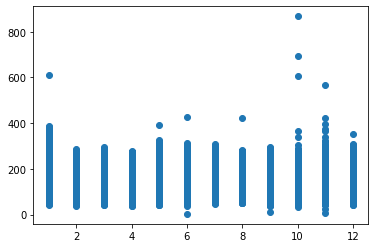

In [14]:
plt.scatter(df['month'],df['num_calls']);

In [22]:
chk = df.groupby('month')['num_calls'].sum()
chk.shape

(12,)

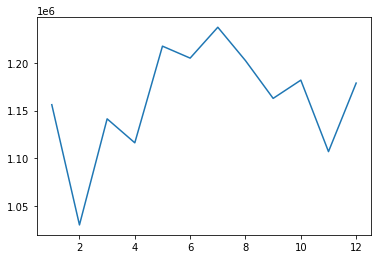

In [23]:
plt.plot(chk);

In [26]:
df.drop(columns=['Unnamed: 0'], inplace=True)


In [28]:
df.corr()['num_calls']

year                        0.211975
month                       0.024806
day                        -0.025615
hour                        0.620379
num_calls                   1.000000
BRONX                       0.896584
BROOKLYN                    0.918724
MANHATTAN                   0.907948
QUEENS                      0.879657
RICHMOND / STATEN ISLAND    0.624136
UNKNOWN                     0.001204
Name: num_calls, dtype: float64

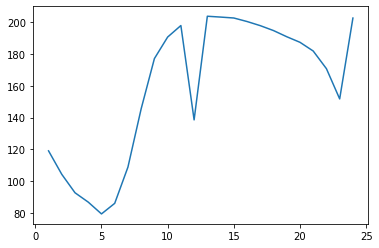

In [32]:
chk = df.groupby('hour')['num_calls'].mean()
plt.plot(chk);

In [54]:
X = df[['month', 'hour']]
y = df['num_calls']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)


Train/Test Score:
0.38453475793105607 0.3883517992300095
R2: 0.3883517992300095, RMS: 40.68395309302714


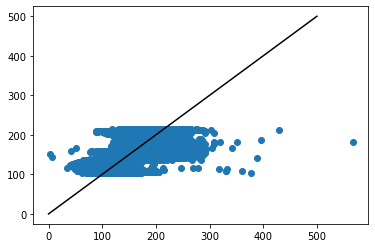

In [55]:
lr = LinearRegression()
lr.fit(X_train,y_train)
preds = lr.predict(X_test)
print('Train/Test Score:')
print(lr.score(X_train,y_train), lr.score(X_test,y_test))
R2 = r2_score(y_test,preds)
RMS = mean_squared_error(y_test,preds,squared=False)
print(f'R2: {R2}, RMS: {RMS}')

plt.plot([0, 500], [0, 500], color='black')
plt.scatter(y_test,preds);

In [56]:
# NULL HYPOTHESIS, FOR COMPARISON:

preds0 = [y_train.median() for y in y_test]

R2: -0.017503540541283114, RMS: 52.47352723802459


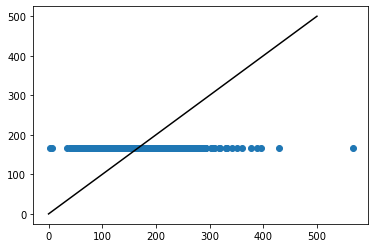

In [57]:
R20 = r2_score(y_test,preds0)
RMS0 = mean_squared_error(y_test,preds0,squared=False)
print(f'R2: {R20}, RMS: {RMS0}')

plt.plot([0, 500], [0, 500], color='black')
plt.scatter(y_test,preds0);

In [58]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [59]:
y_train = np.array(y_train)
y_test  = np.array(y_test)

In [60]:

model = Sequential()
model.add(Input(shape=X_train_sc.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation=None))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
results = model.fit(X_train_sc, y_train, epochs=20, batch_size=256, validation_data=(X_test_sc, y_test))



Train on 65723 samples, validate on 21908 samples
Epoch 1/20
65723/65723 [==============================] - 4s 64us/sample - loss: 16553.0848 - mae: 109.7023 - val_loss: 3022.1653 - val_mae: 44.3857
Epoch 2/20
65723/65723 [==============================] - 3s 51us/sample - loss: 2502.0005 - mae: 40.5744 - val_loss: 2073.7612 - val_mae: 37.0314
Epoch 3/20
65723/65723 [==============================] - 3s 43us/sample - loss: 1858.8035 - mae: 35.0772 - val_loss: 1665.6644 - val_mae: 33.2811
Epoch 4/20
65723/65723 [==============================] - 2s 35us/sample - loss: 1473.5719 - mae: 31.0873 - val_loss: 1261.3320 - val_mae: 28.7702
Epoch 5/20
65723/65723 [==============================] - 2s 32us/sample - loss: 1155.9734 - mae: 27.1996 - val_loss: 1078.4381 - val_mae: 25.9759
Epoch 6/20
65723/65723 [==============================] - 2s 32us/sample - loss: 1062.4790 - mae: 25.7634 - val_loss: 1033.3621 - val_mae: 25.4060
Epoch 7/20
65723/65723 [==============================] - 2s 31us/

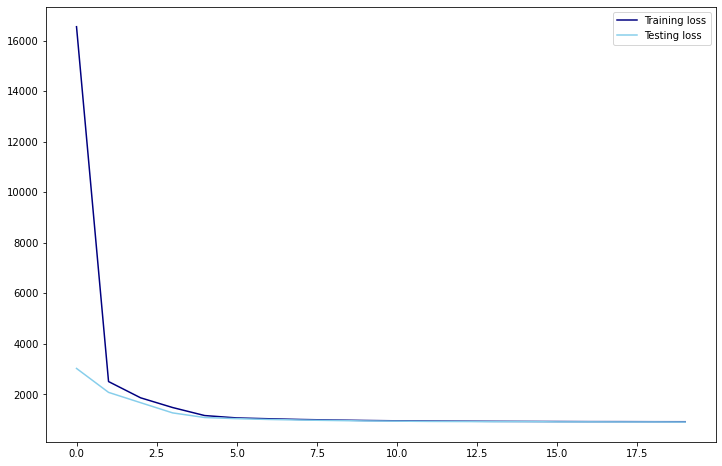

In [61]:
train_loss = results.history['loss']
test_loss = results.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();

In [62]:
preds_nn = model.predict(X_test_sc)

Train/Test Score:
R2: 0.6676115946536576, RMS: 29.991295550119954


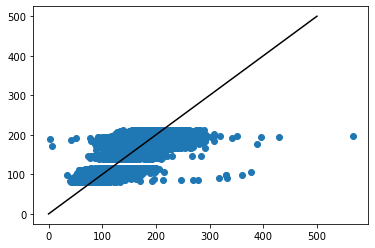

In [63]:
print('Train/Test Score:')
R2 = r2_score(y_test,preds_nn)
RMS = mean_squared_error(y_test,preds_nn,squared=False)
print(f'R2: {R2}, RMS: {RMS}')

plt.plot([0, 500], [0, 500], color='black')
plt.scatter(y_test,preds_nn);

In [64]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65723 entries, 21525 to 15795
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   month   65723 non-null  int64
 1   hour    65723 non-null  int64
dtypes: int64(2)
memory usage: 1.5 MB
